# EDA


In [50]:
# Importing Libraries

import numpy as np   # For Numerical Analysis
import pandas as pd  # For Dataframe creation Series Analysis
import seaborn as sns # For Model Libraries and Visualisation


In [51]:
#Importing Dataset
df=pd.read_csv('Student_Performance.csv')

In [52]:
#Visualising the dataset
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [53]:
# Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [54]:
#Checking for null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [55]:
# Count Duplicated Values
df.duplicated().sum()

np.int64(127)

In [56]:
#Shape of the dataset
df.shape

(10000, 6)

In [57]:
#Visualising the Duplicate data
duplicates=df[df.duplicated()]
print(duplicates)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
915               9               52                         No            5   
1477              7               61                        Yes            6   
1601              5               99                         No            7   
1786              2               62                        Yes            9   
2026              5               87                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sample Question Papers Practiced 

In [58]:
# Removing The Duplicate Data
df_clean=df.drop_duplicates()

In [59]:
#Checking for duplicate Values & missing Values
print(df_clean[df_clean.duplicated()].shape)
print(df_clean.isnull().sum())

(0, 6)
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [60]:
# Renaming the Dataset
df_clean=df_clean.rename(columns={"Hours Studied":"Hours_Studied","Previous Scores":"Previous_Scores","Extracurricular Activities":"Extracurricular_Activities","Sleep Hours":"Sleep_Hours","Sample Question Papers Practiced":"QP_Practiced","Performance Index":"Performance_Index"})

In [61]:
df_clean.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,QP_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Visualization


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

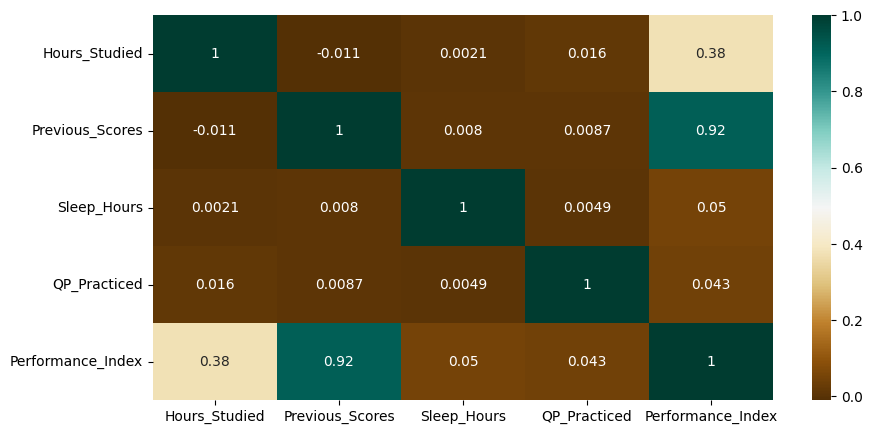

In [63]:
plt.figure(figsize=(10,5))
c=df_clean.select_dtypes(include='number').corr()
sns.heatmap(c,cmap='BrBG',annot=True)

# Model Prediction

In [64]:
import sklearn

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_clean.Extracurricular_Activities=le.fit_transform(df_clean.Extracurricular_Activities)
df_clean.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,QP_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [66]:
y=df_clean['Performance_Index']
x=df_clean['Previous_Scores']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.linear_model import LinearRegression


In [70]:
lr=LinearRegression()

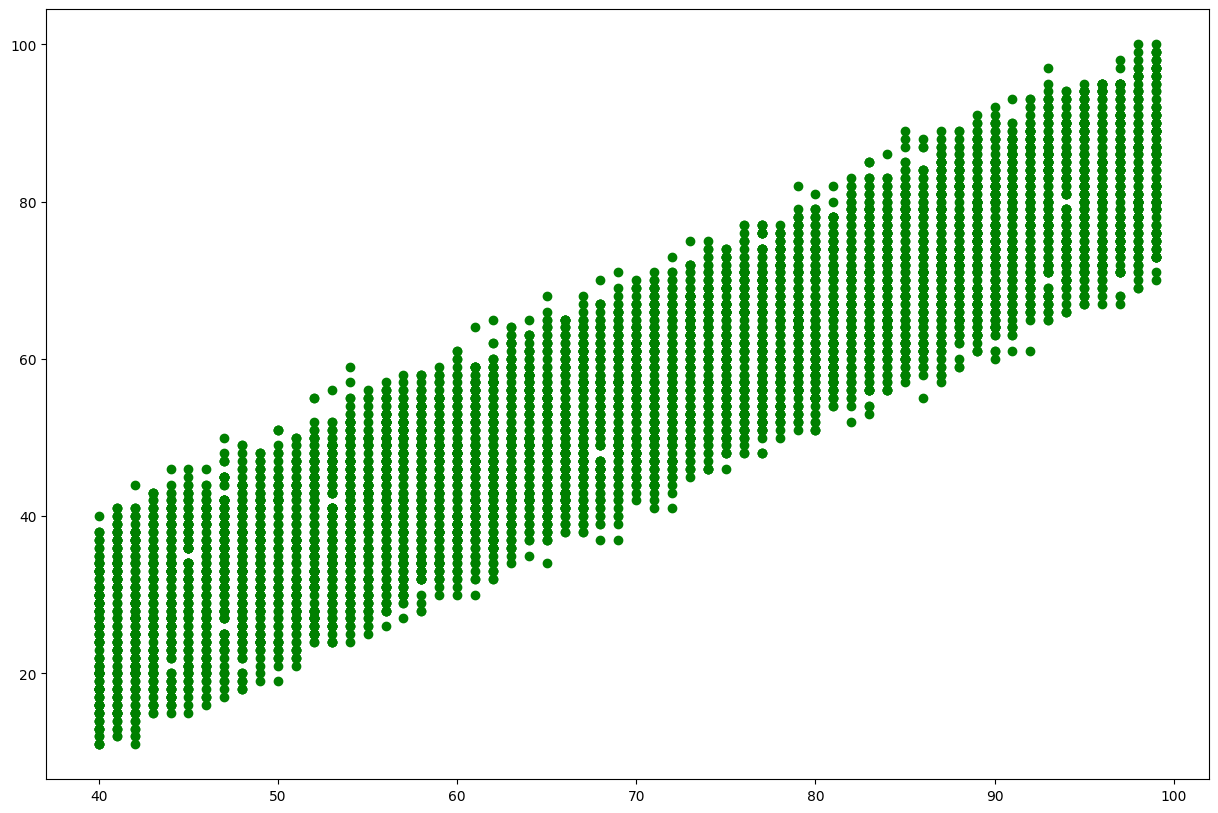

In [72]:
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train,color='green')

In [49]:
lr.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
